# Global Terrorism Analysis

In [81]:
from multiprocessing.reduction import duplicate
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.basemap import Basemap
from wordcloud import WordCloud
from scipy import stats

In [2]:
terror = pd.read_csv(r'C:\Users\Nikita\DataspellProjects\GlobalTerrorismDatabase\globalterrorismdb_0718dist.csv', encoding='ISO-8859-1', low_memory=False)

In [10]:
terror.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [3]:
terror.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [12]:
terror.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
terror['weapdetail'].unique()

array([nan, 'Explosive', 'Incendiary', ...,
       'More than 10 mortars were used in the attack.',
       'A 9-mm carbine rifle was used in the attack.',
       'An explosive device containing a detonating cord, a battery, and a blasting cap was used in the attack.'],
      dtype=object)

In [5]:
missing_values = terror.isnull().sum()
print(missing_values)

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64


## Data cleaning and preprocessing

In [6]:
#Deleting cells with more than 50% missing values
threshold = 0.5 * len(terror)
drop_columns = missing_values[missing_values > threshold].index
terror = terror.drop(columns=drop_columns)

In [8]:
terror.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 58 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   eventid           181691 non-null  int64  
 1   iyear             181691 non-null  int64  
 2   imonth            181691 non-null  int64  
 3   iday              181691 non-null  int64  
 4   extended          181691 non-null  int64  
 5   country           181691 non-null  int64  
 6   country_txt       181691 non-null  object 
 7   region            181691 non-null  int64  
 8   region_txt        181691 non-null  object 
 9   provstate         181270 non-null  object 
 10  city              181256 non-null  object 
 11  latitude          177135 non-null  float64
 12  longitude         177134 non-null  float64
 13  specificity       181685 non-null  float64
 14  vicinity          181691 non-null  int64  
 15  summary           115562 non-null  object 
 16  crit1             18

In [7]:
terror['nkill'] = terror['nkill'].fillna(0).astype(int)
terror['attacktype1_txt'] = terror['attacktype1_txt'].fillna('Unknown') 

In [9]:
terror.isnull().sum()

eventid                 0
iyear                   0
imonth                  0
iday                    0
extended                0
country                 0
country_txt             0
region                  0
region_txt              0
provstate             421
city                  435
latitude             4556
longitude            4557
specificity             6
vicinity                0
summary             66129
crit1                   0
crit2                   0
crit3                   0
doubtterr               1
multiple                1
success                 0
suicide                 0
attacktype1             0
attacktype1_txt         0
targtype1               0
targtype1_txt           0
targsubtype1        10373
targsubtype1_txt    10373
corp1               42552
target1               638
natlty1              1559
natlty1_txt          1559
gname                   0
guncertain1           380
individual              0
nperps              71115
nperpcap            69489
claimed     

In [10]:
missing_values_columns = terror.columns[terror.isnull().any()]
df_null_values = terror[missing_values_columns]

In [13]:
df_null_values.head(50)

,provstate,city,latitude,longitude,specificity,summary,doubtterr,multiple,targsubtype1,targsubtype1_txt,...,weapsubtype1,weapsubtype1_txt,weapdetail,nkillus,nkillter,nwound,nwoundus,nwoundte,ishostkid,scite1
0,NaN,Santo Domingo,18.456792,-69.951164,1.0,NaN,0.0,0.0,68.0,Named Civilian,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN
1,Federal,Mexico city,19.371887,-99.086624,1.0,NaN,0.0,0.0,45.0,"Diplomatic Personnel (outside of embassy, cons...",...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1.0,NaN
2,Tarlac,Unknown,15.478598,120.599741,4.0,NaN,0.0,0.0,54.0,Radio Journalist/Staff/Facility,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN
3,Attica,Athens,37.997490,23.762728,1.0,NaN,0.0,0.0,46.0,Embassy/Consulate,...,16.0,Unknown Explosive Type,Explosive,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,Fukouka,Fukouka,33.580412,130.396361,1.0,NaN,-9.0,0.0,46.0,Embassy/Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,0.0,NaN
5,Illinois,Cairo,37.005105,-89.176269,1.0,1/1/1970: Unknown African American assailants ...,0.0,0.0,22.0,"Police Building (headquarters, station, school)",...,5.0,Unknown Gun Type,Several gunshots were fired.,0.0,0.0,0.0,0.0,0.0,0.0,"""Police Chief Quits,"" Washington Post, January..."
6,Montevideo,Montevideo,-34.891151,-56.187214,1.0,NaN,0.0,0.0,25.0,Police Security Forces/Officers,...,2.0,Automatic or Semi-Automatic Rifle,Automatic firearm,NaN,NaN,0.0,NaN,NaN,0.0,NaN
7,California,Oakland,37.791927,-122.225906,1.0,1/2/1970: Unknown perpetrators detonated explo...,1.0,0.0,107.0,Electricity,...,16.0,Unknown Explosive Type,NaN,0.0,0.0,0.0,0.0,0.0,0.0,Committee on Government Operations United Stat...
8,Wisconsin,Madison,43.076592,-89.412488,1.0,"1/2/1970: Karl Armstrong, a member of the New ...",0.0,0.0,28.0,Military Recruiting Station/Academy,...,19.0,Molotov Cocktail/Petrol Bomb,Firebomb consisting of gasoline,0.0,0.0,0.0,0.0,0.0,0.0,"Tom Bates, ""Rads: The 1970 Bombing of the Army..."
9,Wisconsin,Madison,43.072950,-89.386694,1.0,"1/3/1970: Karl Armstrong, a member of the New ...",0.0,0.0,21.0,Government Building/Facility/Office,...,20.0,Gasoline or Alcohol,Poured gasoline on the floor and lit it with a...,0.0,0.0,0.0,0.0,0.0,0.0,Committee on Government Operations United Stat...


In [12]:
df_null_values['provstate'].unique()

array([nan, 'Federal', 'Tarlac', ..., 'Carlow', 'Western Lakes',
       'Vidzeme'], dtype=object)

In [18]:
terror = terror.drop(columns = ['summary'], axis = 1)


In [21]:
terror.isnull().sum()

eventid                 0
iyear                   0
imonth                  0
iday                    0
extended                0
country                 0
country_txt             0
region                  0
region_txt              0
provstate               0
city                    0
latitude             4556
longitude            4557
specificity             6
vicinity                0
crit1                   0
crit2                   0
crit3                   0
doubtterr               1
multiple                1
success                 0
suicide                 0
attacktype1             0
attacktype1_txt         0
targtype1               0
targtype1_txt           0
targsubtype1        10373
targsubtype1_txt    10373
corp1               42552
target1               638
natlty1              1559
natlty1_txt          1559
gname                   0
guncertain1           380
individual              0
nperps              71115
nperpcap            69489
claimed             66120
weaptype1   

In [20]:
terror.to_csv(r'C:\Users\Nikita\DataspellProjects\GlobalTerrorismDatabase\terror.csv',encoding='ISO-8859-1', index=False )

In [22]:
# Fill missing numerical values with 0
numerical_columns = terror.select_dtypes(include=['float64', 'int64']).columns
terror[numerical_columns] = terror[numerical_columns].fillna(0)
# Fill missing categorical values with 'Unknown'
categorical_columns = terror.select_dtypes(include=['object']).columns
terror[categorical_columns] = terror[categorical_columns].fillna("Unknown")
# Drop low variance columns 
low_variance_columns = [col for col in terror.columns if terror[col].nunique() == 1]
terror.drop(columns=low_variance_columns, inplace=True)
# Strip spaces and convert to uppercase 
for col in categorical_columns:
    terror[col] = terror[col].str.strip().str.upper()

In [23]:
terror.isnull().sum()

eventid             0
iyear               0
imonth              0
iday                0
extended            0
country             0
country_txt         0
region              0
region_txt          0
provstate           0
city                0
latitude            0
longitude           0
specificity         0
vicinity            0
crit1               0
crit2               0
crit3               0
doubtterr           0
multiple            0
success             0
suicide             0
attacktype1         0
attacktype1_txt     0
targtype1           0
targtype1_txt       0
targsubtype1        0
targsubtype1_txt    0
corp1               0
target1             0
natlty1             0
natlty1_txt         0
gname               0
guncertain1         0
individual          0
nperps              0
nperpcap            0
claimed             0
weaptype1           0
weaptype1_txt       0
weapsubtype1        0
weapsubtype1_txt    0
weapdetail          0
nkill               0
nkillus             0
nkillter  

## Feature engineering 

In [29]:
# Create feature casulties 
terror['total_casualties'] = terror['nkill'] + terror['nwound']
terror[['nkill','nwound','total_casualties']].tail(20)

,nkill,nwound,total_casualties
181671,4,9.0,13.0
181672,8,3.0,11.0
181673,18,14.0,32.0
181674,5,0.0,5.0
181675,2,3.0,5.0
181676,5,0.0,5.0
181677,0,0.0,0.0
181678,1,1.0,2.0
181679,13,0.0,13.0
181680,0,0.0,0.0


In [32]:
terror.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 59 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   eventid           181691 non-null  int64  
 1   iyear             181691 non-null  int64  
 2   imonth            181691 non-null  int64  
 3   iday              181691 non-null  int64  
 4   extended          181691 non-null  int64  
 5   country           181691 non-null  int64  
 6   country_txt       181691 non-null  object 
 7   region            181691 non-null  int64  
 8   region_txt        181691 non-null  object 
 9   provstate         181691 non-null  object 
 10  city              181691 non-null  object 
 11  latitude          181691 non-null  float64
 12  longitude         181691 non-null  float64
 13  specificity       181691 non-null  float64
 14  vicinity          181691 non-null  int64  
 15  crit1             181691 non-null  int64  
 16  crit2             18

In [31]:
# Create a decade column 
terror['decade'] = (terror['iyear'] // 10) * 10
terror['decade'].head(20)

0     1970
1     1970
2     1970
3     1970
4     1970
5     1970
6     1970
7     1970
8     1970
9     1970
10    1970
11    1970
12    1970
13    1970
14    1970
15    1970
16    1970
17    1970
18    1970
19    1970
Name: decade, dtype: int64

In [36]:
# remove duplicates if any
duplicates = terror.duplicated().sum()
terror.drop_duplicates(inplace=True)

In [71]:
terror.to_csv(r'C:\Users\Nikita\DataspellProjects\GlobalTerrorismDatabase\terror_cleaned.csv',encoding='ISO-8859-1', index=False )

## Exploratory Data Analysis

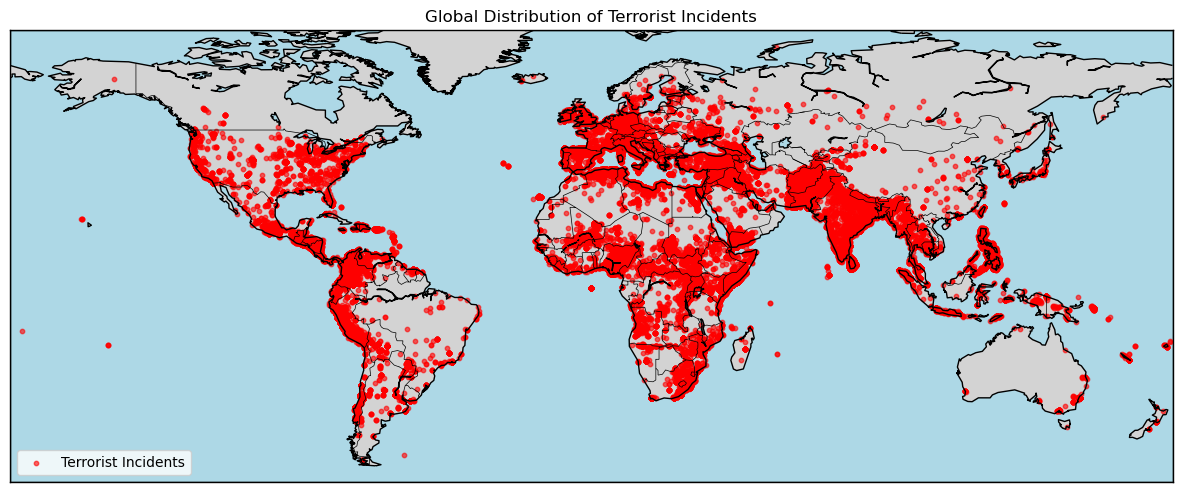

In [55]:
# Initialize the Basemap
plt.figure(figsize=(15, 10))
m = Basemap(projection='cyl',llcrnrlat=-60, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180, resolution='c')  

m.drawcoastlines()
m.drawcountries()
m.drawmapboundary(fill_color='lightblue')
m.fillcontinents(color='lightgrey', lake_color='lightblue')

x, y = m(terror['longitude'].values, terror['latitude'].values) 
m.scatter(x, y, s=10, color='red', alpha=0.6, label="Terrorist Incidents")

plt.title("Global Distribution of Terrorist Incidents")
plt.legend()
plt.show()

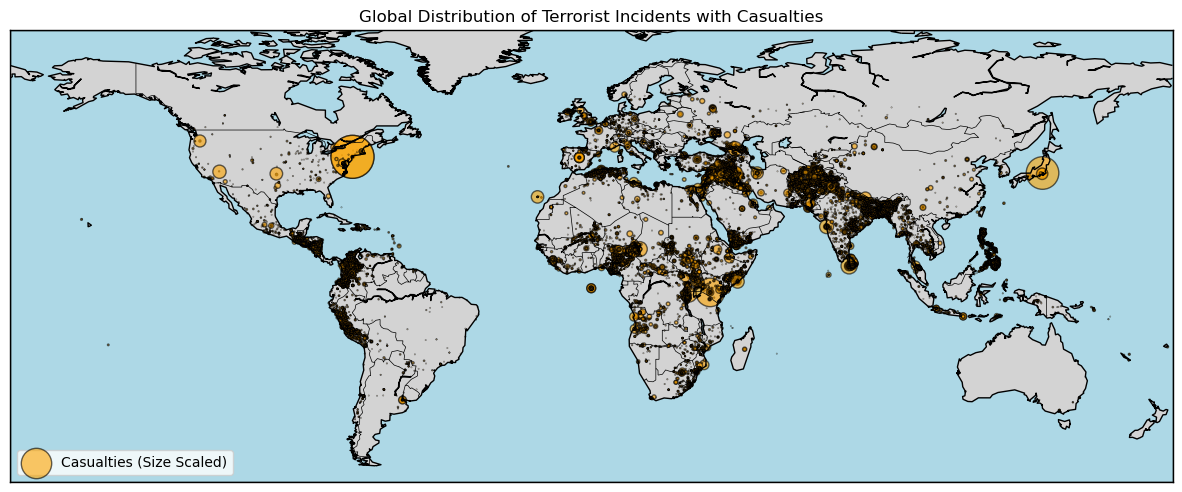

In [56]:
# the size of the points will reflect the number of casualties
plt.figure(figsize=(15, 10))
m = Basemap(projection='cyl',
            llcrnrlat=-60, urcrnrlat=80,
            llcrnrlon=-180, urcrnrlon=180,
            resolution='c')

m.drawcoastlines()
m.drawcountries()
m.drawmapboundary(fill_color='lightblue')
m.fillcontinents(color='lightgrey', lake_color='lightblue')

# Plot terrorist incidents scaled by casualties
x, y = m(terror['longitude'].values, terror['latitude'].values)
m.scatter(x, y, s=terror['total_casualties'] / 10, color='orange', alpha=0.6, edgecolor="k", label="Casualties (Size Scaled)")

plt.title("Global Distribution of Terrorist Incidents with Casualties")
plt.legend()
plt.show()

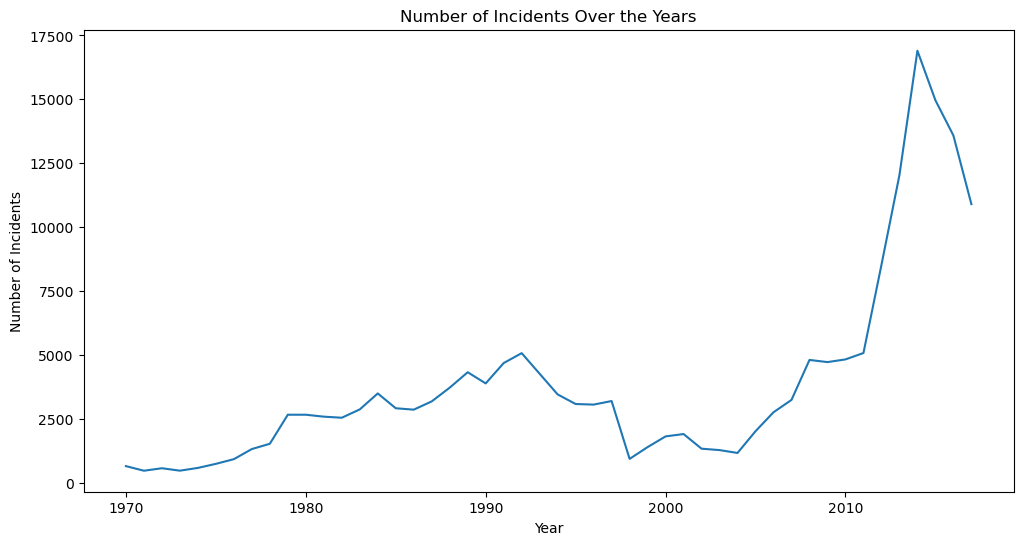

In [41]:
# top years with most incidents 
incidents_per_year = terror['iyear'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x=incidents_per_year.index, y=incidents_per_year.values)
plt.title("Number of Incidents Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Incidents")
plt.show()

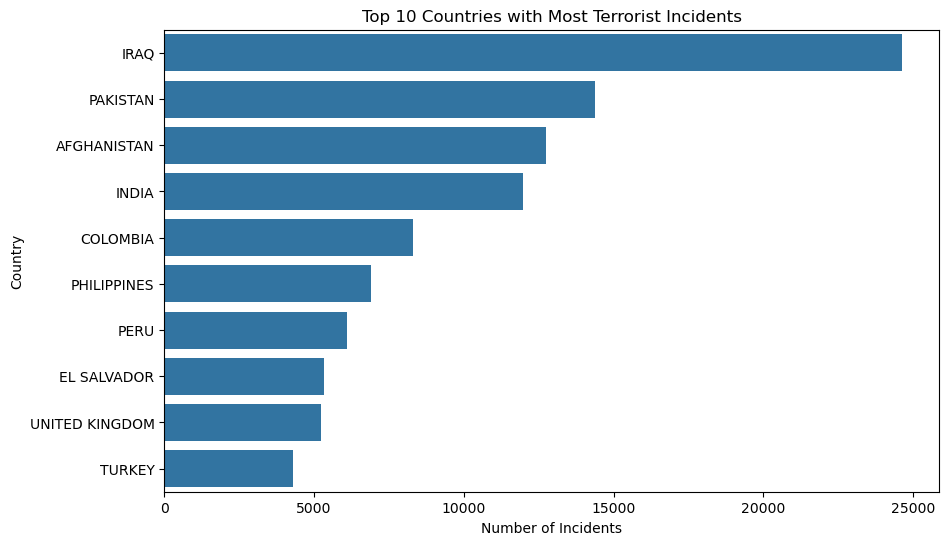

In [42]:
# top 10 countries with the most incidents 
top_countries = terror['country_txt'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title("Top 10 Countries with Most Terrorist Incidents")
plt.xlabel("Number of Incidents")
plt.ylabel("Country")
plt.show()

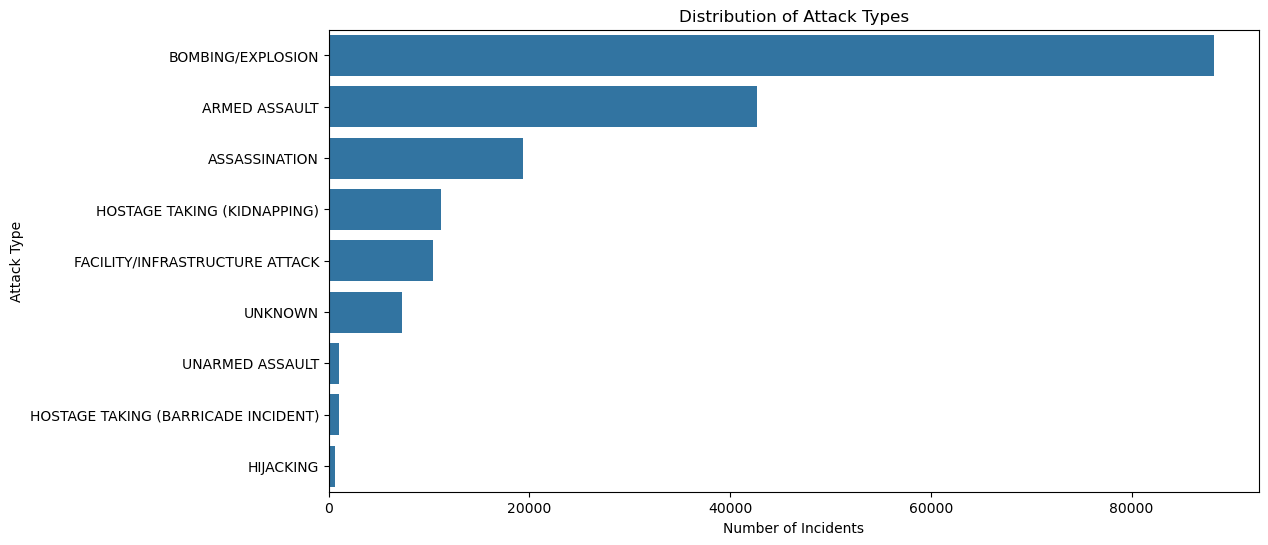

In [43]:
# Distribution of attack types 
attack_types = terror['attacktype1_txt'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=attack_types.values, y=attack_types.index)
plt.title("Distribution of Attack Types")
plt.xlabel("Number of Incidents")
plt.ylabel("Attack Type")
plt.show()

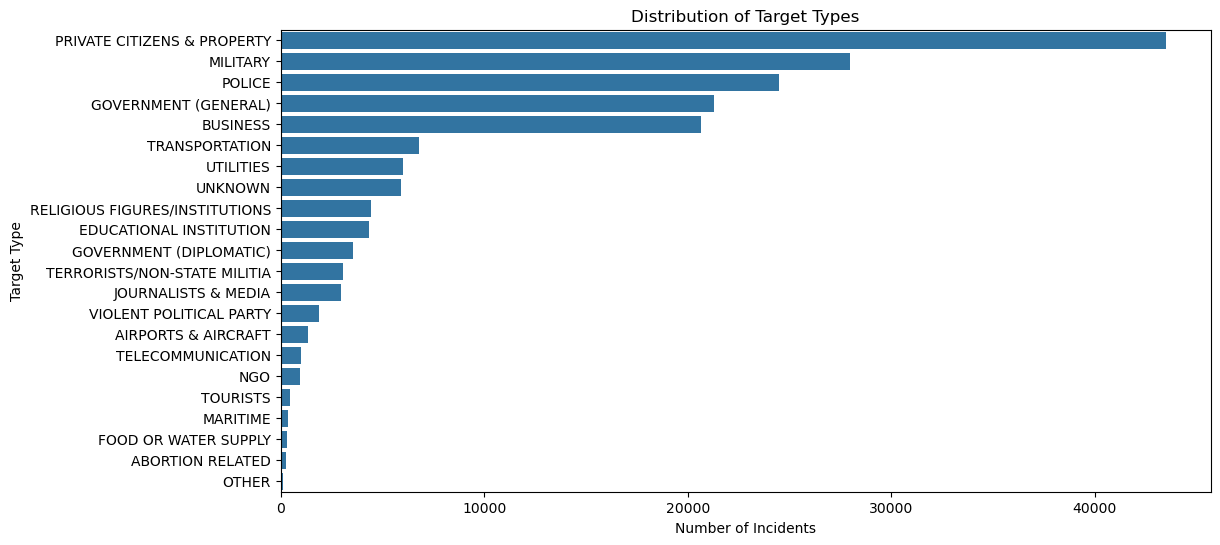

In [44]:
# Distribution of targets
target_types = terror['targtype1_txt'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=target_types.values, y=target_types.index)
plt.title("Distribution of Target Types")
plt.xlabel("Number of Incidents")
plt.ylabel("Target Type")
plt.show()

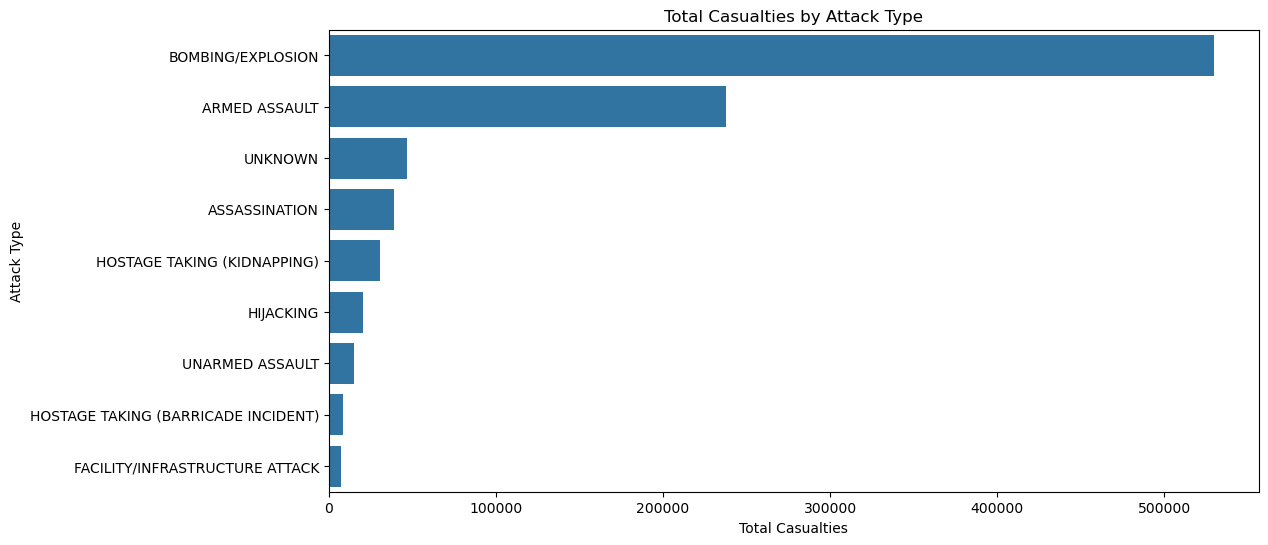

In [46]:
# Total casualties for each attack type
attack_casualties = terror.groupby('attacktype1_txt')['total_casualties'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=attack_casualties.values, y=attack_casualties.index)
plt.title("Total Casualties by Attack Type")
plt.xlabel("Total Casualties")
plt.ylabel("Attack Type")
plt.show()

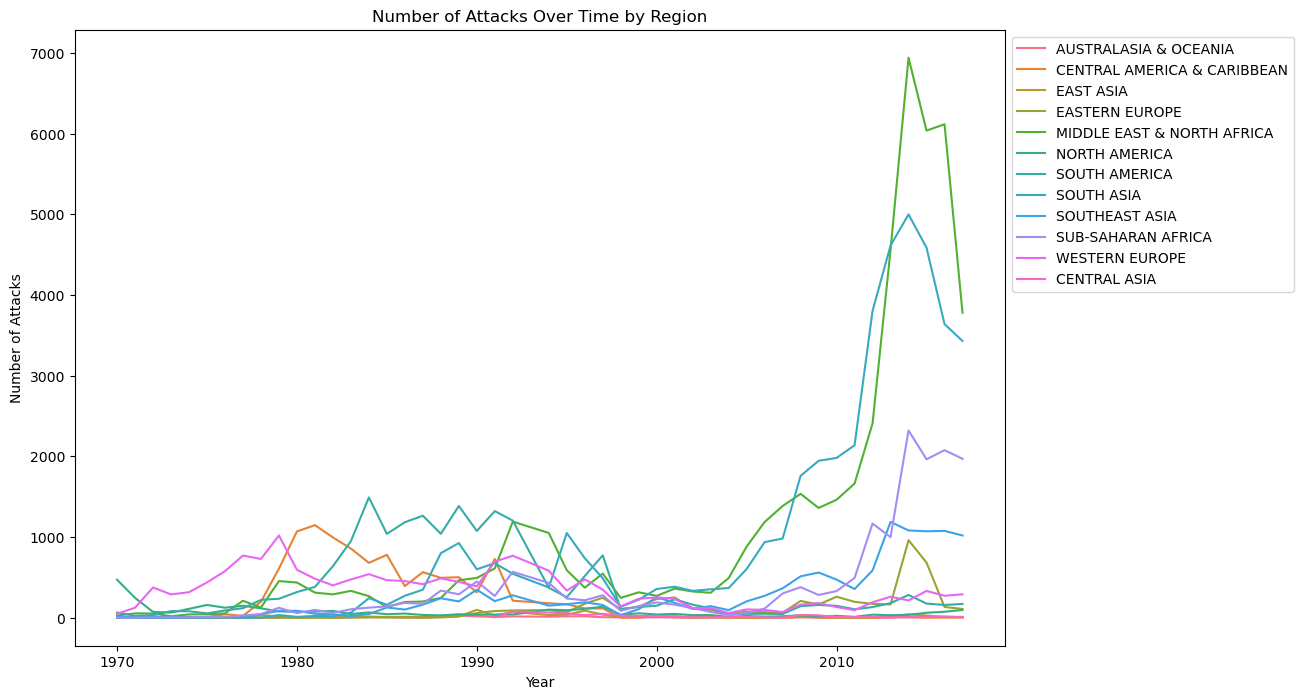

In [47]:
# Group data by year and region
attacks_by_year_region = terror.groupby(['iyear', 'region_txt']).size().reset_index(name='counts')
plt.figure(figsize=(12, 8))
sns.lineplot(x='iyear', y='counts', hue='region_txt', data=attacks_by_year_region)
plt.title("Number of Attacks Over Time by Region")
plt.xlabel("Year")
plt.ylabel("Number of Attacks")
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

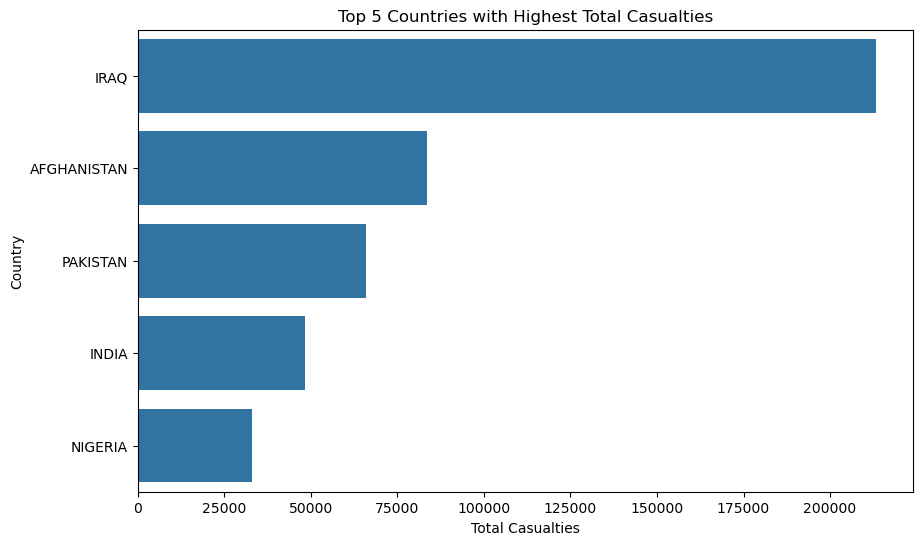

In [57]:
# Top 5 countries with most incidents
top_countries_casualties = terror.groupby('country_txt')['total_casualties'].sum().nlargest(5)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries_casualties.values, y=top_countries_casualties.index)
plt.title("Top 5 Countries with Highest Total Casualties")
plt.xlabel("Total Casualties")
plt.ylabel("Country")
plt.show()

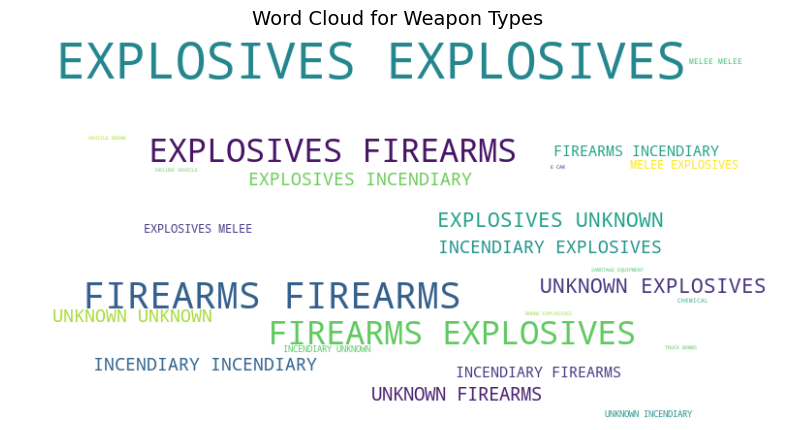

In [65]:
# Combine all words in the 'weaptype1_txt' column
weapon_text = ' '.join(terror['weaptype1_txt'].dropna().astype(str))

# Generate the word cloud
wordcloud_weapon = WordCloud(width=800, height=400, background_color='white').generate(weapon_text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_weapon, interpolation='bilinear')
plt.axis('off')  # Remove axes
plt.title("Word Cloud for Weapon Types", fontsize=14)
plt.show()

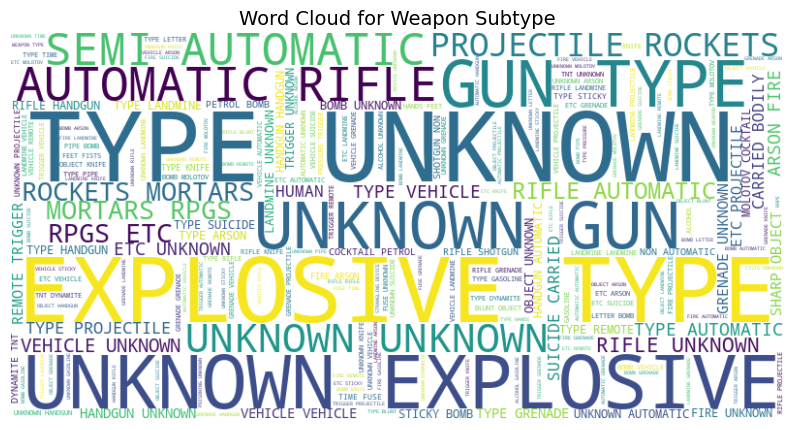

In [64]:

weapon_type_text = ' '.join(terror['weapsubtype1_txt'].dropna().astype(str))

wordcloud_weapon_type = WordCloud(width=800, height=400, background_color='white').generate(weapon_type_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_weapon_type, interpolation='bilinear')
plt.axis('off') 
plt.title("Word Cloud for Weapon Subtype", fontsize=14)
plt.show()

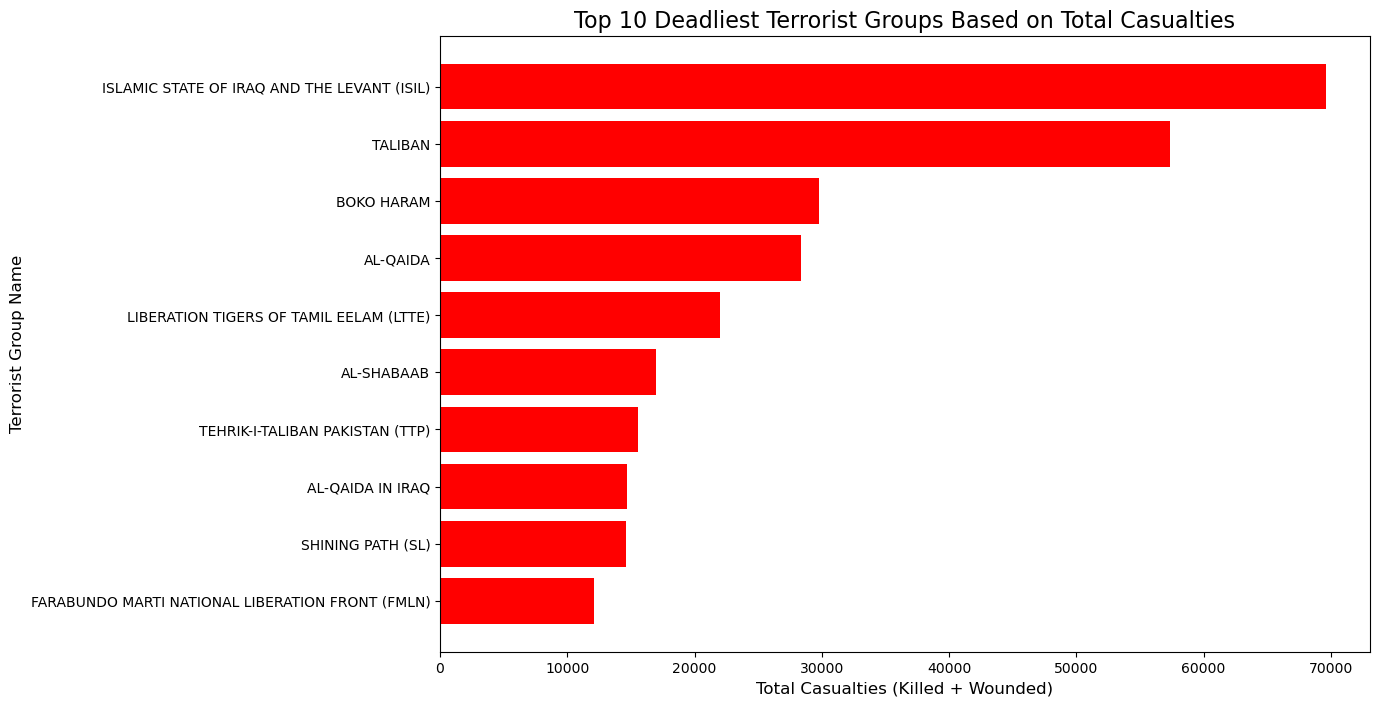

In [88]:
# top 10 deadliest terrorist groups
# exclude unknown category
terror = terror[terror['gname'].str.upper() != "UNKNOWN"]
# Group by 'gname' and calculate the total casualties
deadliest_groups = terror.groupby('gname')['total_casualties'].sum().reset_index()
# Sort groups by casualties in descending order
top_deadliest_groups = deadliest_groups.sort_values(by='total_casualties', ascending=False).head(10)

plt.figure(figsize=(12, 8))
plt.barh(top_deadliest_groups['gname'], top_deadliest_groups['total_casualties'], color='red')
plt.gca().invert_yaxis() 

plt.title("Top 10 Deadliest Terrorist Groups Based on Total Casualties", fontsize=16)
plt.xlabel("Total Casualties (Killed + Wounded)", fontsize=12)
plt.ylabel("Terrorist Group Name", fontsize=12)

plt.show()

## Statistical analysis
**Null Hypothesis**: The number of terrorist incidents has remained constant over the years.  
**Alternative Hypothesis**: The number of terrorist incidents has significantly increased or decreased over the years. 

In [77]:
annual_counts = terror.groupby('iyear').size().reset_index(name='incident_count')

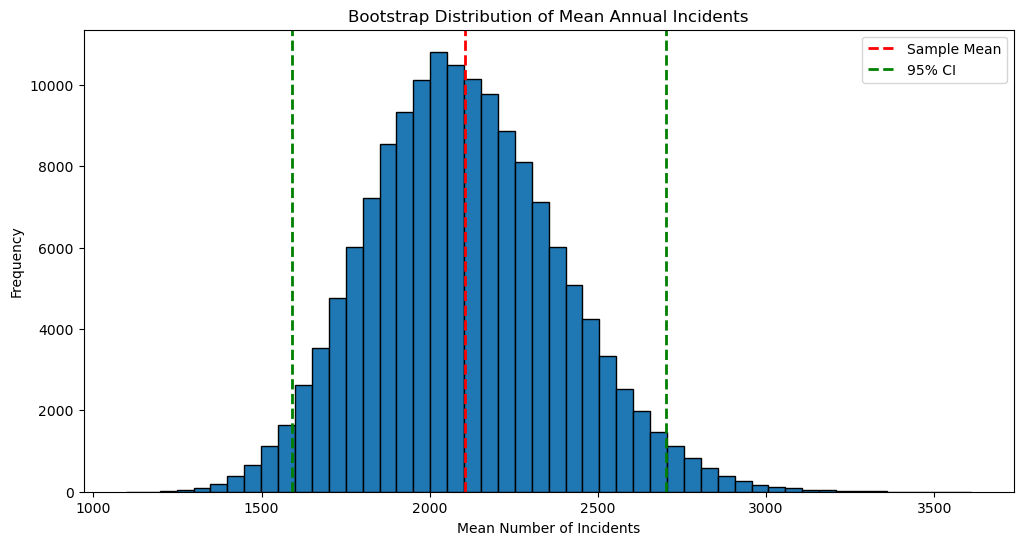


Bootstrap Analysis Results:
Mean of bootstrap samples: 2104.57
95% Confidence Interval: (1589.42, 2702.64)


In [79]:
# Set random seed for reproducibility
np.random.seed(42)
# Number of bootstrap samples
n_bootstrap = 150000
# Function to calculate mean for a bootstrap sample
bootstrap_means = []
for _ in range(n_bootstrap):
    # Sample with replacement
    bootstrap_sample = np.random.choice(
        annual_counts['incident_count'],
        size=len(annual_counts),
        replace=True
    )
    bootstrap_means.append(np.mean(bootstrap_sample))
# Convert to numpy array
bootstrap_means = np.array(bootstrap_means)
# Calculate confidence intervals
confidence_interval = np.percentile(bootstrap_means, [2.5, 97.5])

plt.figure(figsize=(12, 6))
plt.hist(bootstrap_means, bins=50, edgecolor='black')
plt.axvline(np.mean(annual_counts['incident_count']), color='red', linestyle='dashed', linewidth=2, label='Sample Mean')
plt.axvline(confidence_interval[0], color='green', linestyle='dashed', linewidth=2, label='95% CI')
plt.axvline(confidence_interval[1], color='green', linestyle='dashed', linewidth=2)

plt.title('Bootstrap Distribution of Mean Annual Incidents')
plt.xlabel('Mean Number of Incidents')
plt.ylabel('Frequency')
plt.legend()
plt.show()

print("\nBootstrap Analysis Results:")
print(f"Mean of bootstrap samples: {np.mean(bootstrap_means):.2f}")
print(f"95% Confidence Interval: ({confidence_interval[0]:.2f}, {confidence_interval[1]:.2f})")

The bootstrap analysis, performed with 150,000 resamples, yielded a mean of 2104.57 incidents per year with a 95% confidence interval ranging from 1589.42 to 2702.64 incidents. The distribution of bootstrap means follows an approximately normal distribution, indicating robust sampling. The relatively wide confidence interval suggests considerable variability in the annual occurrence of terrorist incidents. This statistical resampling approach provides a reliable estimate of the uncertainty in our mean calculation and demonstrates the high year-to-year variability in terrorist activities within the dataset.

In [82]:
# Split the data into two periods
median_year = annual_counts['iyear'].median()
first_period = annual_counts[annual_counts['iyear'] < median_year]['incident_count']
second_period = annual_counts[annual_counts['iyear'] >= median_year]['incident_count']

# Perform independent t-test
t_stat, p_value = stats.ttest_ind(first_period, second_period)

print("\nT-Test Analysis Results:")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")
print("\nMeans by period:")
print(f"First period mean (before {median_year}): {first_period.mean():.2f}")
print(f"Second period mean (after {median_year}): {second_period.mean():.2f}")


T-Test Analysis Results:
T-statistic: -1.5594
P-value: 0.1259

Means by period:
First period mean (before 1994.0): 1653.09
Second period mean (after 1994.0): 2537.00


The independent t-test comparing terrorist incidents between two periods (before and after 1994) revealed a higher mean in the second period (2537.00) compared to the first period (1653.09). However, with a t-statistic of -1.5594 and a p-value of 0.1259 which exceed the conventional 0.05 significance level, the difference between periods is not statistically significant. Despite the apparent increase in mean incidents, the high variability in the data prevents us from concluding that there has been a significant change in terrorist activity between these periods.

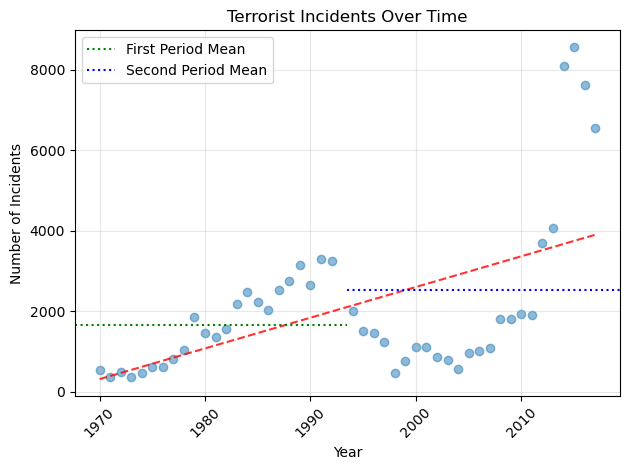

In [85]:
# Create the main scatter plot
plt.scatter(annual_counts['iyear'], annual_counts['incident_count'], alpha=0.5)

# Add trend line
z = np.polyfit(annual_counts['iyear'], annual_counts['incident_count'], 1)
p = np.poly1d(z)
plt.plot(annual_counts['iyear'], p(annual_counts['iyear']), "r--", alpha=0.8)

# Add period means
plt.axhline(y=first_period.mean(), color='g', linestyle=':',xmin=0, xmax=0.5, label='First Period Mean')
plt.axhline(y=second_period.mean(), color='b', linestyle=':', xmin=0.5, xmax=1, label='Second Period Mean')

plt.title('Terrorist Incidents Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.grid(True, alpha=0.3)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The time series visualization illustrates the trend of terrorist incidents from 1970 to 2017, depicting both raw data points and statistical indicators. The red dashed line represents the overall trend, showing a gradual upward trajectory. The plot distinguishes between two periods via horizontal mean lines: the first period (green dotted) and second period (blue dotted), highlighting the increase in average incidents over time. Notable spikes in terrorist activities are observed in recent years (2010-2017), with some years exceeding 8,000 incidents. However, the substantial variability in the data points, particularly evident in the latter years, suggests that the trend is not uniformly consistent throughout the studied period.

## Conclusion

Based on the comprehensive statistical analysis of terrorist incidents over time, we fail to reject the null hypothesis that the number of terrorist incidents has remained constant over the years. Although descriptive statistics indicate an increase in mean incidents from 1653.09 to 2537.00 between the two periods, both the t-test (p=0.1259) and bootstrap analysis (CI: 1589.42-2702.64) demonstrate that this difference is not statistically significant. The wide confidence interval and high p-value suggest substantial variability in the data, making it impossible to conclusively determine a significant trend in terrorist activities during the studied period.

There are several limitations in this analysis. The dataset may suffer from reporting bias, particularly in earlier years, where incident documentation might have been less systematic. Moreover, further observation required since we can notice substetial spike in attacks from 2010. 